In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *
from sympy.physics.mechanics import *
from sympy import sqrt, Rational
import time

# enable LaTeX printing
init_vprinting()

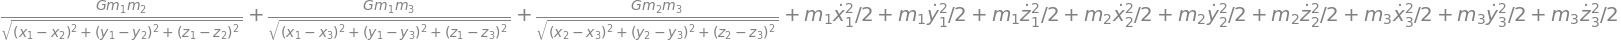

In [10]:
# create symbolic variables
m_1, m_2, m_3, G, t = symbols('m_1 m_2 m_3 G t')

# dynamic symbols
x_1, x_2, x_3, y_1, y_2, y_3, z_1, z_2, z_3 = dynamicsymbols('x_1 x_2 x_3 y_1 y_2 y_3 z_1 z_2 z_3')


def mag(x, y, z):
    mean = sqrt(x**2 + y**2 + z**2)
    return mean

# calculate distances d:
d1_2 = mag((x_2 - x_1), (y_2 - y_1), (z_2 - z_1))
d2_3 = mag((x_3 - x_2), (y_3 - y_2), (z_3 - z_2))
d3_1 = mag((x_1 - x_3), (y_1 - y_3), (z_1 - z_3))

# derivatives
x_1_dot = diff(x_1, t)
x_1_ddot = diff(x_1_dot, t)

x_2_dot = diff(x_2, t)
x_2_ddot = diff(x_2_dot, t)

x_3_dot = diff(x_3, t)
x_3_ddot = diff(x_3_dot, t)

y_1_dot = diff(y_1, t)
y_1_ddot = diff(y_1_dot, t)

y_2_dot = diff(y_2, t)
y_2_ddot = diff(y_2_dot, t)

y_3_dot = diff(y_3, t)
y_3_ddot = diff(y_3_dot, t)

z_1_dot = diff(z_1, t)
z_1_ddot = diff(z_1_dot, t)

z_2_dot = diff(z_2, t)
z_2_ddot = diff(z_2_dot, t)

z_3_dot = diff(z_3, t)
z_3_ddot = diff(z_3_dot, t)

# Lagrangian
T = Rational(1,2)*(m_1*(mag(x_1_dot, y_1_dot, z_1_dot))**2 + m_2*(mag(x_2_dot, y_2_dot, z_2_dot))**2 + m_3*(mag(x_3_dot, y_3_dot, z_3_dot))**2)
V_1 = -G*(m_1*m_2)/d1_2
V_2 = -G*(m_2*m_3)/d2_3
V_3 = -G*(m_3*m_1)/d3_1
V = V_1 + V_2 + V_3
L = T - V

# Simplify the Lagrangian
L = simplify(L)
L

In [11]:
# Euler-Lagrange Equation
t_0=time.time()
eqn_1 = diff(diff(L, x_1_dot), t) - diff(L, x_1)
eqn_2 = diff(diff(L, x_2_dot), t) - diff(L, x_2)
eqn_3 = diff(diff(L, x_3_dot), t) - diff(L, y_3)
eqn_4 = diff(diff(L, y_1_dot), t) - diff(L, y_1)
eqn_5 = diff(diff(L, y_2_dot), t) - diff(L, y_2)
eqn_6 = diff(diff(L, y_3_dot), t) - diff(L, y_3)
eqn_7 = diff(diff(L, z_1_dot), t) - diff(L, z_1)
eqn_8 = diff(diff(L, z_2_dot), t) - diff(L, z_2)
eqn_9 = diff(diff(L, z_3_dot), t) - diff(L, z_3)
t_1=time.time()
print("formulating equations:", t_1-t_0, "seconds")
sln= solve([eqn_6], [y_3_ddot])
t_2=time.time()
print("solving x6:", t_2-t_1, "seconds")
print(sln)
sln = solve([eqn_1, eqn_2, eqn_3, eqn_4, eqn_5, eqn_6, eqn_7, eqn_8, eqn_9], [x_1_ddot, x_2_ddot, x_3_ddot, y_1_ddot, y_2_ddot, y_3_ddot, z_1_ddot, z_2_ddot, z_3_ddot])
t_3=time.time()
print("solving all equations:", (t_3-t_2)/60, "minutes")
f = Matrix([x_1_dot, sln[x_1_ddot], x_2_dot, sln[x_2_ddot], x_3_dot, sln[x_3_ddot], y_1_dot, sln[y_1_ddot], y_2_dot, sln[y_2_ddot], y_3_dot, sln[y_3_ddot], z_1_dot, sln[z_1_ddot], z_2_dot, sln[z_2_ddot], z_3_dot, sln[z_3_ddot]])
#f = Matrix([y_3_dot, sln[y_3_ddot]])
t_4=time.time()
f = simplify(f)
t_5=time.time()
print("simplifying f:", (t_5-t_4)/60, "minutes")
x = Matrix([x_1, x_1_dot, x_2, x_2_dot, x_3, x_3_dot, y_1, y_1_dot, y_2, y_2_dot, y_3, y_3_dot, z_1, z_1_dot, z_2, z_2_dot, z_3, z_3_dot])
#x = Matrix([x_1, x_1_dot])
x_dot = diff(x, t)

Eq(x_dot, f)

formulating equations: 0.25005674362182617 seconds
solving x6: 2.4545536041259766 seconds
{Derivative(y_3(t), (t, 2)): G*m_1*sqrt(x_2(t)**2 - 2*x_2(t)*x_3(t) + x_3(t)**2 + y_2(t)**2 - 2*y_2(t)*y_3(t) + y_3(t)**2 + z_2(t)**2 - 2*z_2(t)*z_3(t) + z_3(t)**2)*x_2(t)**2*y_1(t)/(sqrt(x_1(t)**2 - 2*x_1(t)*x_3(t) + x_3(t)**2 + y_1(t)**2 - 2*y_1(t)*y_3(t) + y_3(t)**2 + z_1(t)**2 - 2*z_1(t)*z_3(t) + z_3(t)**2)*sqrt(x_2(t)**2 - 2*x_2(t)*x_3(t) + x_3(t)**2 + y_2(t)**2 - 2*y_2(t)*y_3(t) + y_3(t)**2 + z_2(t)**2 - 2*z_2(t)*z_3(t) + z_3(t)**2)*x_1(t)**2*x_2(t)**2 - 2*sqrt(x_1(t)**2 - 2*x_1(t)*x_3(t) + x_3(t)**2 + y_1(t)**2 - 2*y_1(t)*y_3(t) + y_3(t)**2 + z_1(t)**2 - 2*z_1(t)*z_3(t) + z_3(t)**2)*sqrt(x_2(t)**2 - 2*x_2(t)*x_3(t) + x_3(t)**2 + y_2(t)**2 - 2*y_2(t)*y_3(t) + y_3(t)**2 + z_2(t)**2 - 2*z_2(t)*z_3(t) + z_3(t)**2)*x_1(t)**2*x_2(t)*x_3(t) + sqrt(x_1(t)**2 - 2*x_1(t)*x_3(t) + x_3(t)**2 + y_1(t)**2 - 2*y_1(t)*y_3(t) + y_3(t)**2 + z_1(t)**2 - 2*z_1(t)*z_3(t) + z_3(t)**2)*sqrt(x_2(t)**2 - 2*x_2(t)*x

       ⎡                                                                      
       ⎢                                                                      
       ⎢  ⎛        ___________________________________________________________
       ⎢  ⎜       ╱   2               2     2               2     2           
       ⎢G⋅⎝- m₂⋅╲╱  x₁  - 2⋅x₁⋅x₃ + x₃  + y₁  - 2⋅y₁⋅y₃ + y₃  + z₁  - 2⋅z₁⋅z₃ 
       ⎢──────────────────────────────────────────────────────────────────────
       ⎢                                                                      
       ⎢                                                                      
       ⎢                                                                      
       ⎢                                                                      
       ⎢                                                                      
       ⎢                                                                      
       ⎢   ⎛      __________________________________

In [12]:
g = f.subs({x_1: 'x_1', x_1_dot: 'x_1_dot', x_2: 'x_2', x_2_dot: 'x_2_dot', x_3: 'x_3', x_3_dot: 'x_3_dot', y_1: 'y_1', y_1_dot: 'y_1_dot', y_2: 'y_2', y_2_dot: 'y_2_dot', y_3: 'y_3', y_3_dot: 'y_3_dot', z_1: 'z_1', z_1_dot: 'z_1_dot', z_2: 'z_2', z_2_dot: 'z_2_dot', z_3: 'z_3', z_3_dot: 'z_3_dot'})
ODE=[]
for i in range(18):
    ODE.append(str(g[i]))
    print('f[{}] = {}'.format(i, g[i]))
%store ODE



f[0] = x_1_dot
f[1] = G*(-m_2*x_1**3*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + m_2*x_1**2*x_2*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1**2*x_3*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - 2*m_2*x_1*x_2*x_3*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*x_3**2*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*y_1**2*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) + 2*m_2*x_1*y_1*y_3*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*y_3**2*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_1**2 - 2*z_1*z_3 + z_3**2) - m_2*x_1*z_1**2*sqrt(x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2 + z_